# DATA LOAD
https://mimic.mit.edu/iii/
- ROW_ID :  simply a row identifier unique to that table
- SUBJECT_ID : a unique patient
- HADM_ID : a unique hospital admission

In [5]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold

In [7]:
data = pd.read_csv('/project/guri/data/process_data.csv')
data

,환자id,ITEM_50800,ITEM_50801,ITEM_50802,ITEM_50803,ITEM_50804,ITEM_50805,ITEM_50806,ITEM_50808,ITEM_50809,...,ITEM_51519,ITEM_51520,ITEM_51521,ITEM_51523,ITEM_51525,ITEM_51526,ITEM_51529,ITEM_51533,ITEM_51537,EXPIRE_FLAG
0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,37,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,99863,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7795,99934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7796,99937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7797,99944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [8]:
data.iloc[:,1:-1].sum().sum()/5381310

0.06026729550982939

In [9]:
7799*690

5381310

In [10]:
data.iloc[:,1:-1].sum()

ITEM_50800       0.0
ITEM_50801       0.0
ITEM_50802       0.0
ITEM_50803     744.0
ITEM_50804    4697.0
               ...  
ITEM_51525       0.0
ITEM_51526       2.0
ITEM_51529      52.0
ITEM_51533       0.0
ITEM_51537       0.0
Length: 690, dtype: float64

In [11]:
data.iloc[:,1:-1].sum(axis=1).sort_values(ascending=False)

272     115.0
5786    110.0
1047    109.0
5345    108.0
3894    107.0
        ...  
191       6.0
2173      6.0
7681      6.0
7527      4.0
683       1.0
Length: 7799, dtype: float64

#  process

In [12]:
xx=[]
yy = []
for i in range(len(data.index)):
    if i % 5 == 0:
#         print(i)
        yy.append(i)
    else : 
        xx.append(i)

In [13]:
train = data.iloc[[i-1 for i in xx],:]
train = train.sort_values(by='환자id').reset_index(drop=True)

In [14]:
test = data.iloc[[i-1 for i in yy],:]
test = test.sort_values(by='환자id').reset_index(drop=True)

In [15]:
train.head()

,환자id,ITEM_50800,ITEM_50801,ITEM_50802,ITEM_50803,ITEM_50804,ITEM_50805,ITEM_50806,ITEM_50808,ITEM_50809,...,ITEM_51519,ITEM_51520,ITEM_51521,ITEM_51523,ITEM_51525,ITEM_51526,ITEM_51529,ITEM_51533,ITEM_51537,EXPIRE_FLAG
0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,41,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [16]:
test.head()

,환자id,ITEM_50800,ITEM_50801,ITEM_50802,ITEM_50803,ITEM_50804,ITEM_50805,ITEM_50806,ITEM_50808,ITEM_50809,...,ITEM_51519,ITEM_51520,ITEM_51521,ITEM_51523,ITEM_51525,ITEM_51526,ITEM_51529,ITEM_51533,ITEM_51537,EXPIRE_FLAG
0,37,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,112,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,156,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,177,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Catboost

In [19]:
n_est = 2000
seed = 42
n_fold = 15
n_class = 1

target = 'EXPIRE_FLAG'
X = train.drop(target, axis=1)
y = train[target]
X_test = test.drop(target, axis=1)
y_test = test[target]

In [23]:
skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
folds=[]
for train_idx, valid_idx in skfold.split(X, y):
        folds.append((train_idx, valid_idx))

cat_pred = np.zeros((X.shape[0]))
cat_pred_test = np.zeros((X_test.shape[0]))
# cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'ID']
for fold in range(n_fold):
    print(f'\n----------------- Fold {fold} -----------------\n')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
    train_data = Pool(data=X_train, label=y_train)
    valid_data = Pool(data=X_valid, label=y_valid)

    model_cat = CatBoostClassifier()
    model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)
  
    cat_pred[valid_idx] = model_cat.predict(X_valid)
    cat_pred_test += model_cat.predict(X_test) / n_fold
    print(f'정확도: {metrics.accuracy_score(y_valid, cat_pred[valid_idx]):.6f}')
    
print(f'\t정확도: {metrics.accuracy_score(y, cat_pred):.6f}')


----------------- Fold 0 -----------------

Learning rate set to 0.048967
0:	learn: 0.6834948	test: 0.6845989	best: 0.6845989 (0)	total: 4.97ms	remaining: 4.97s
100:	learn: 0.5261467	test: 0.5766387	best: 0.5766387 (100)	total: 458ms	remaining: 4.08s
200:	learn: 0.4819572	test: 0.5686926	best: 0.5670884 (189)	total: 889ms	remaining: 3.53s
300:	learn: 0.4393119	test: 0.5674044	best: 0.5665715 (234)	total: 1.32s	remaining: 3.08s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5665714671
bestIteration = 234

Shrink model to first 235 iterations.
정확도: 0.723558

----------------- Fold 1 -----------------

Learning rate set to 0.048967
0:	learn: 0.6833982	test: 0.6825285	best: 0.6825285 (0)	total: 4.61ms	remaining: 4.6s
100:	learn: 0.5295801	test: 0.5407396	best: 0.5407396 (100)	total: 440ms	remaining: 3.91s
200:	learn: 0.4818032	test: 0.5269375	best: 0.5266575 (196)	total: 880ms	remaining: 3.5s
300:	learn: 0.4384234	test: 0.5208949	best: 0.5207074 (298)	total: 1.32s	re

500:	learn: 0.3744239	test: 0.5355552	best: 0.5349959 (480)	total: 2.29s	remaining: 2.28s
600:	learn: 0.3493524	test: 0.5379618	best: 0.5348417 (510)	total: 2.74s	remaining: 1.82s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5348417021
bestIteration = 510

Shrink model to first 511 iterations.
정확도: 0.740385

----------------- Fold 12 -----------------

Learning rate set to 0.048967
0:	learn: 0.6845786	test: 0.6847916	best: 0.6847916 (0)	total: 4.76ms	remaining: 4.76s
100:	learn: 0.5292418	test: 0.5442059	best: 0.5442059 (100)	total: 457ms	remaining: 4.07s
200:	learn: 0.4834242	test: 0.5267023	best: 0.5266180 (198)	total: 906ms	remaining: 3.6s
300:	learn: 0.4393031	test: 0.5193459	best: 0.5191839 (296)	total: 1.36s	remaining: 3.17s
400:	learn: 0.4064050	test: 0.5156561	best: 0.5153058 (397)	total: 1.81s	remaining: 2.71s
500:	learn: 0.3770973	test: 0.5142127	best: 0.5142127 (500)	total: 2.27s	remaining: 2.26s
600:	learn: 0.3520805	test: 0.5138030	best: 0.5129046 (

# RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X,y)
y_pred = forest.predict(X_test)

In [32]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.7134615384615385


In [33]:
model_cat.get_feature_importance()

array([1.03423716e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.04189431e-01, 1.12203701e-01, 1.23293499e-01, 8.63209641e-01,
       3.95305769e-01, 7.71881343e-01, 0.00000000e+00, 1.24273337e+00,
       0.00000000e+00, 1.11613321e+00, 6.71218849e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.89117780e-01, 0.00000000e+00,
       5.49098777e-01, 3.88668310e-01, 9.07267790e-01, 0.00000000e+00,
       1.00480905e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.07693084e+00, 7.74665551e-02, 0.00000000e+00,
       0.00000000e+00, 3.51047459e-01, 0.00000000e+00, 0.00000000e+00,
      

In [45]:
X_test.columns[1:]

Index(['ITEM_50800', 'ITEM_50801', 'ITEM_50802', 'ITEM_50803', 'ITEM_50804',
       'ITEM_50805', 'ITEM_50806', 'ITEM_50808', 'ITEM_50809', 'ITEM_50810',
       ...
       'ITEM_51518', 'ITEM_51519', 'ITEM_51520', 'ITEM_51521', 'ITEM_51523',
       'ITEM_51525', 'ITEM_51526', 'ITEM_51529', 'ITEM_51533', 'ITEM_51537'],
      dtype='object', length=690)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

In [41]:
len(model_cat.get_feature_importance()), len(X_test.columns[0:])

(691, 691)

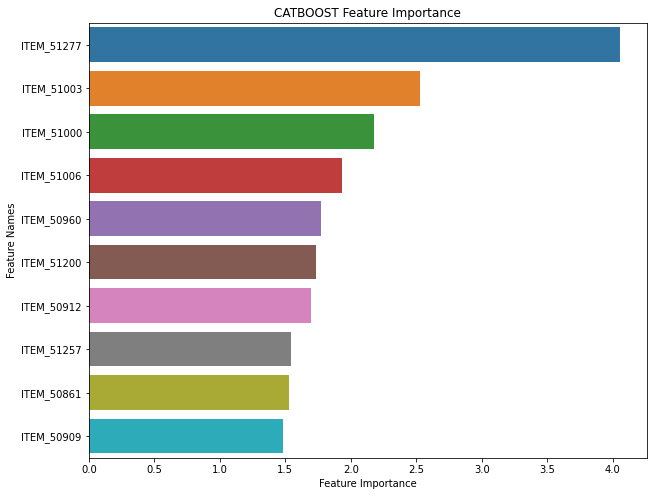

In [43]:
plot_feature_importance(model_cat.get_feature_importance()[1:],X_test.columns[1:],'CATBOOST')

In [277]:
data

,환자id,ITEM_50800,ITEM_50801,ITEM_50802,ITEM_50803,ITEM_50804,ITEM_50805,ITEM_50806,ITEM_50808,ITEM_50809,...,ITEM_51519,ITEM_51520,ITEM_51521,ITEM_51523,ITEM_51525,ITEM_51526,ITEM_51529,ITEM_51533,ITEM_51537,EXPIRE_FLAG
0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,37,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,99863,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7795,99934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7796,99937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7797,99944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<AxesSubplot:xlabel='ITEM_51277', ylabel='count'>

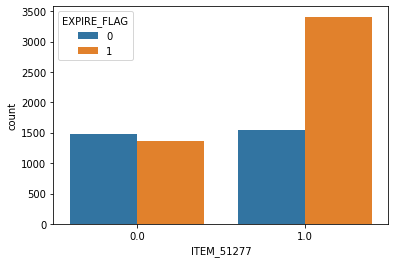

In [280]:
sns.countplot(data['ITEM_51277'], hue=data['EXPIRE_FLAG'])

<AxesSubplot:xlabel='ITEM_51003', ylabel='count'>

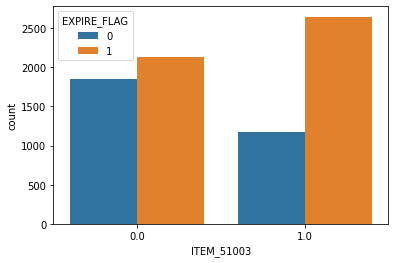

In [281]:
sns.countplot(data['ITEM_51003'], hue=data['EXPIRE_FLAG'])

In [247]:
data['ITEM_51277'].sum()

4944.0

In [263]:
item = pd.read_csv('/data/MIMIC_III/D_LABITEMS.csv')

In [283]:
item[item['ITEMID']==51003]

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
329,203,51003,Troponin T,Blood,Chemistry,6598-7


In [265]:
item

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN
...,...,...,...,...,...,...
748,749,51551,VOIDED SPECIMEN,OTHER BODY FLUID,HEMATOLOGY,NaN
749,750,51552,VOIDED SPECIMEN,STOOL,CHEMISTRY,NaN
750,751,51553,VOIDED SPECIMEN,URINE,CHEMISTRY,NaN
751,752,51554,VOIDED SPECIMEN,JOINT FLUID,HEMATOLOGY,NaN


In [270]:
lab = pd.read_csv('/data/MIMIC_III/LABEVENTS.csv')
lab

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal
...,...,...,...,...,...,...,...,...,...
27854050,27428435,96443,103219.0,50882,2109-12-30 01:40:00,26,26.00,mEq/L,NaN
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal
27854052,27428437,96443,103219.0,50902,2109-12-30 01:40:00,97,97.00,mEq/L,NaN
27854053,27428438,96443,103219.0,50911,2109-12-30 01:40:00,2,2.00,ng/mL,NaN


In [282]:
lab[lab['ITEMID']==51003]

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
4331,4742,9,150750.0,51003,2149-11-09 11:20:00,<0.01,NaN,ng/mL,NaN
5191,4879,9,150750.0,51003,2149-11-10 09:40:00,<0.01,NaN,ng/mL,NaN
5194,4882,9,150750.0,51003,2149-11-10 16:33:00,<0.01,NaN,ng/mL,NaN
5376,5064,9,150750.0,51003,2149-11-13 16:04:00,<0.01,NaN,ng/mL,NaN
5396,5084,9,150750.0,51003,2149-11-13 23:56:00,0.01,0.01,ng/ml,NaN
...,...,...,...,...,...,...,...,...,...
27851777,27782988,99115,132152.0,51003,2193-12-31 07:16:00,0.12,0.12,ng/mL,abnormal
27852085,27780694,99096,190010.0,51003,2110-07-14 17:00:00,0.41,0.41,ng/mL,abnormal
27853014,27772598,99064,126677.0,51003,2158-08-04 20:16:00,13.7,13.70,ng/mL,abnormal
27853120,27731416,98790,187987.0,51003,2200-10-16 07:15:00,<0.01,NaN,ng/mL,NaN
